In [239]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import os

In [209]:
data=pd.read_csv('gdp.csv')

In [210]:
df=pd.DataFrame(data)

In [211]:
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


DataSet walkthrough

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB


In [213]:
df.isna().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [214]:
df.describe()

,Year,Value
count,11507.000000,1.150700e+04
mean,1991.265230,1.005972e+12
std,15.886648,4.533056e+12
min,1960.000000,8.824448e+06
25%,1978.000000,2.056874e+09
50%,1993.000000,1.436880e+10
75%,2005.000000,1.796394e+11
max,2016.000000,7.904923e+13


In [215]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [216]:
df['Country Code'].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

Plot of a countries GDP 

In [217]:
df_in=df[df['Country Name']=='India']

<Axes: xlabel='Year', ylabel='Value'>

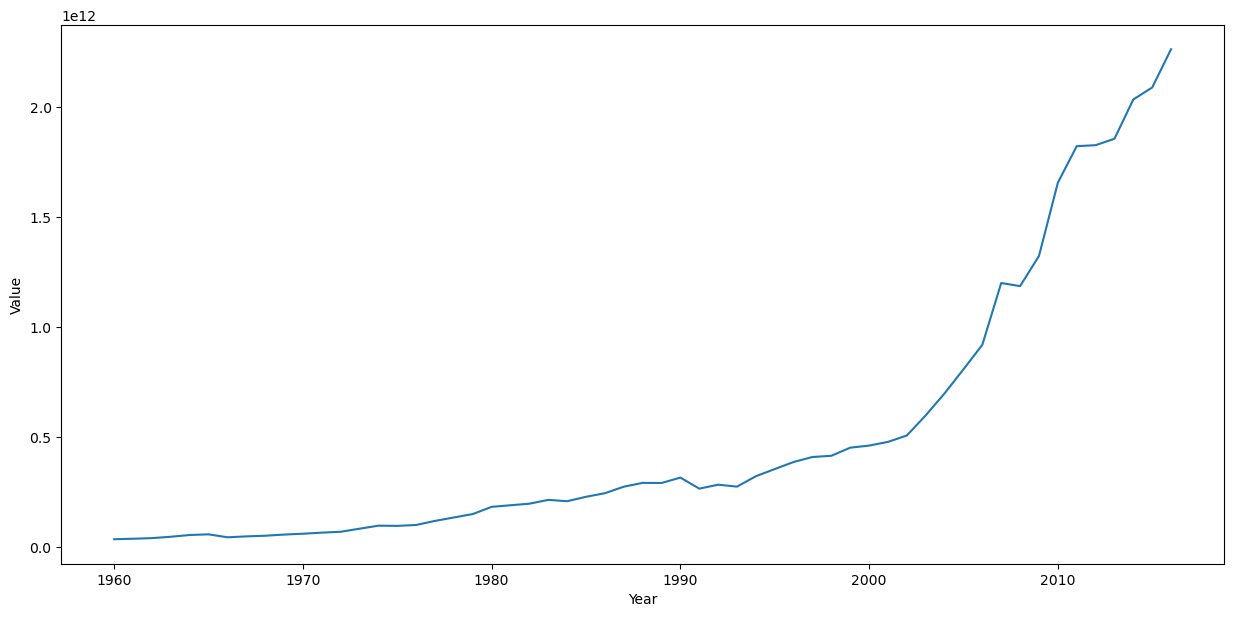

In [218]:
plt.figure(figsize=(15,7))
sns.lineplot(df_in,x='Year',y='Value')

OR

<Axes: xlabel='YEARS', ylabel='GDP'>

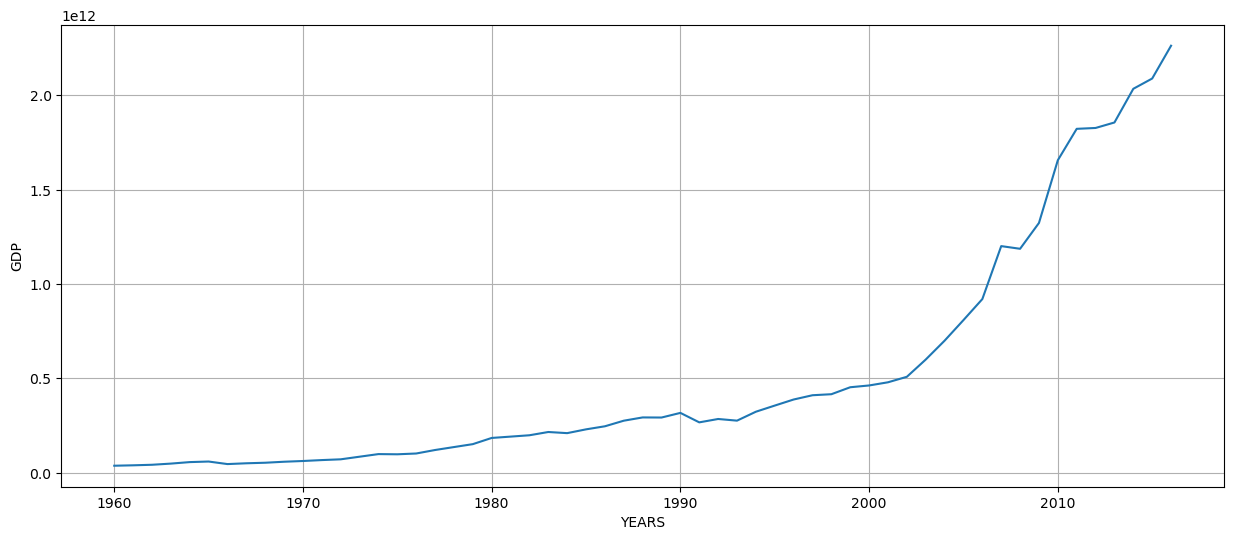

In [219]:
df_in.plot(kind = 'line', x = 'Year', y = 'Value',
           figsize = (15,6),
           legend = False,
           grid = True,
           ylabel = 'GDP',
           xlabel = 'YEARS')

Caluclate the Growth of a country (GDP)

In [220]:
in_gdp=df_in['Value'].values
growth=[0]
for i in range(1,len(in_gdp)):
    growth.append(round((in_gdp[i]-in_gdp[i-1])*100/in_gdp[i-1],2))


In [221]:
growth

[0,
 5.95,
 7.47,
 14.85,
 16.64,
 5.44,
 -22.99,
 9.31,
 5.89,
 10.1,
 6.8,
 7.9,
 6.11,
 19.66,
 16.38,
 -1.06,
 4.31,
 18.27,
 13.02,
 11.43,
 21.79,
 3.85,
 3.73,
 8.74,
 -2.8,
 9.59,
 7.09,
 12.07,
 6.29,
 -0.18,
 8.42,
 -15.85,
 6.7,
 -3.09,
 17.18,
 10.09,
 9.05,
 5.85,
 1.32,
 8.89,
 2.09,
 3.64,
 6.08,
 18.01,
 16.69,
 15.61,
 13.77,
 30.51,
 -1.18,
 11.54,
 25.13,
 10.05,
 0.25,
 1.59,
 9.62,
 2.68,
 8.32]

In [222]:
len(growth)

57

In [223]:
len(df_in)

57

In [224]:
# growth.insert(0,0)

In [225]:
growth

[0,
 5.95,
 7.47,
 14.85,
 16.64,
 5.44,
 -22.99,
 9.31,
 5.89,
 10.1,
 6.8,
 7.9,
 6.11,
 19.66,
 16.38,
 -1.06,
 4.31,
 18.27,
 13.02,
 11.43,
 21.79,
 3.85,
 3.73,
 8.74,
 -2.8,
 9.59,
 7.09,
 12.07,
 6.29,
 -0.18,
 8.42,
 -15.85,
 6.7,
 -3.09,
 17.18,
 10.09,
 9.05,
 5.85,
 1.32,
 8.89,
 2.09,
 3.64,
 6.08,
 18.01,
 16.69,
 15.61,
 13.77,
 30.51,
 -1.18,
 11.54,
 25.13,
 10.05,
 0.25,
 1.59,
 9.62,
 2.68,
 8.32]

In [226]:
df_in['GDP_grow']=growth

/var/folders/8z/kcl22q3d4tg9781ppfplsnfm0000gn/T/ipykernel_18105/216652907.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [227]:
df_in

,Country Name,Country Code,Year,Value,GDP_grow
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64
6079,India,IND,1965,5.876042e+10,5.44
6080,India,IND,1966,4.525364e+10,-22.99
6081,India,IND,1967,4.946617e+10,9.31
6082,India,IND,1968,5.237732e+10,5.89
6083,India,IND,1969,5.766833e+10,10.10


Creating the GDP growth percentage for the whole data set

In [228]:
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [229]:
countries=df['Country Name'].unique()

In [230]:
for i in countries:
    print(i)

Arab World
Caribbean small states
Central Europe and the Baltics
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (excluding high income)
East Asia & Pacific (IDA & IBRD countries)
Euro area
Europe & Central Asia
Europe & Central Asia (excluding high income)
Europe & Central Asia (IDA & IBRD countries)
European Union
Fragile and conflict affected situations
Heavily indebted poor countries (HIPC)
High income
IBRD only
IDA & IBRD total
IDA blend
IDA only
IDA total
Late-demographic dividend
Latin America & Caribbean
Latin America & Caribbean (excluding high income)
Latin America & the Caribbean (IDA & IBRD countries)
Least developed countries: UN classification
Low & middle income
Low income
Lower middle income
Middle East & North Africa
Middle East & North Africa (excluding high income)
Middle East & North Africa (IDA & IBRD countries)
Middle income
North America
OECD members
Other small states
Pacific island small states
Post-demographic dividend
Pre-demographic divide

In [231]:
#automating the process
final_data = []

for country_name in countries:
    
    df_pr = df[df['Country Name'] == country_name]

    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):

        prev = data[i-1][3]
        cur = data[i][3]

        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP=gdp_change)
    final_data.append(df_pr) 

In [232]:
df = pd.concat(final_data, axis = 0)

In [233]:
df

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


GDP of top 50 Countries

In [234]:
df.groupby('Country Name').max()['Value'].sort_values(ascending = False).head(50)

Country Name
World                                                   7.904923e+13
High income                                             5.036240e+13
OECD members                                            4.937008e+13
Post-demographic dividend                               4.673504e+13
IDA & IBRD total                                        2.948247e+13
Low & middle income                                     2.870476e+13
Middle income                                           2.829277e+13
IBRD only                                               2.739661e+13
Europe & Central Asia                                   2.365470e+13
East Asia & Pacific                                     2.248043e+13
Upper middle income                                     2.221220e+13
North America                                           2.016030e+13
Late-demographic dividend                               1.970310e+13
European Union                                          1.913667e+13
United States        

Analysing the GDP over years with interactive plots

In [235]:
df_pr = df[df['Country Name'] == 'World']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'World GDP Analysis')

fig

In [236]:
pyo.plot(fig,filename='World.html')

'World.html'

In [237]:
df_pr = df[df['Country Name'] == 'India']

fig1 = px.line(df_pr, x = 'Year', y = 'Value', title = 'Indian GDP Analysis')
fig1

In [238]:
pyo.plot(fig1,filename='India.html')

'India.html'

GDP of Each Country Interactive plot


In [240]:
os.mkdir('GDP Individual')

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + ' GDP Analysis')
    pyo.plot(fig, filename = 'GDP Individual/' + country_name + '.html', auto_open = False)

GDP of Each Country WRT to  World(80 Trillion)

In [241]:
os.mkdir('GDP Individual WRT World')

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + ' GDP Analysis', range_y = [0,80000000000000])
    pyo.plot(fig, filename = 'GDP Individual WRT World/' + country_name + '.html', auto_open = False)

GDP of All Countries

In [245]:
plt.figure(figsize=(15,20))
fig =px.line(df,x='Year',y='Value',title = 'GDP Analysis of All Countries', color = 'Country Name')
pyo.plot(fig,filename='countries GDP.html')

'countries GDP.html'

<Figure size 1500x2000 with 0 Axes>

GDP Comparison between India & China

In [246]:
c1=df[df['Country Name']=='India']
c2=df[df['Country Name']=='China']

In [248]:
df_pr=pd.concat([c1,c2],axis=0)

In [249]:
df_pr

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64
...,...,...,...,...,...
4098,China,CHN,2012,8.560547e+12,13.05
4099,China,CHN,2013,9.607224e+12,12.23
4100,China,CHN,2014,1.048237e+13,9.11
4101,China,CHN,2015,1.106467e+13,5.55


In [250]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison | India & China', color = 'Country Name')

pyo.plot(fig, filename = 'IND|CHN.html')

'IND|CHN.html'

Comparision with world GDP

In [251]:
c1 = df[df['Country Name'] == 'China']
c2 = df[df['Country Name'] == 'World']

df_pr = pd.concat([c1,c2],axis = 0)

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison | World & China', color = 'Country Name')

pyo.plot(fig, filename = 'WLD|CHN.html')

'WLD|CHN.html'

GDP Comparison between Specific Countries

Defining a function for comparing the countries out of 256

In [252]:
def compare_gdp(lst, isOpen):
    
    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)
        
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst), 
                  color = 'Country Name')
    pyo.plot(fig, filename = '|'.join(lst) + '.html', auto_open = isOpen)
    

In [254]:
compare_gdp(["IND","USA","CHN"],True)

In [255]:
compare_gdp(["IND","USA","RUS","PAK"],True)

GDP Growth Comparies of All the Countries

Also cleaning the missing values of years 

In [256]:
fig = px.line(df, x = 'Year', y = 'GDP', title = 'GDP Comparison', color = 'Country Name')
pyo.plot(fig, filename = 'GDP Growth.html', auto_open = True)

'GDP Growth.html'

GDP Growth of All Countries Graph Individual

In [257]:
os.mkdir('GDP Growth Individual')

for country_name in df['Country Code'].unique():

    df_pr = df[df['Country Code'] == country_name]

    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = country_name)
    pyo.plot(fig, filename = 'GDP Growth Individual/' + country_name + '.html', auto_open = False)

GDP Growth Comparison between Specific Countries

In [258]:
def compare_gdpgro(lst, isOpen):
    
    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)
        
    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Comparison - ' + '|'.join(lst), 
                  color = 'Country Name')
    pyo.plot(fig, filename = '|'.join(lst) + '.html', auto_open = isOpen)
    

In [259]:
compare_gdpgro(['IND','USA','ITA','CHN'], True)

GDP Growth between 1960 - 2016

In [260]:
dfs = []

for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    
    if (len(df_pr) == 57):
        dfs.append(df_pr)
        
df_pr = pd.concat(dfs, axis = 0)

In [261]:
df_pr

,Country Name,Country Code,Year,Value,GDP
49,Caribbean small states,CSS,1960,2.004785e+09,0.00
50,Caribbean small states,CSS,1961,2.169733e+09,8.23
51,Caribbean small states,CSS,1962,2.289495e+09,5.52
52,Caribbean small states,CSS,1963,2.431592e+09,6.21
53,Caribbean small states,CSS,1964,2.626896e+09,8.03
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


120 countries with 57 years of constant record GDP Growth

In [262]:
fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Growth', color = 'Country Name')

pyo.plot(fig, filename = 'GDP Growth.html', auto_open = True)

'GDP Growth.html'